In [1]:
import numpy as np
import pandas as pd

# Load dataset
df = pd.read_csv("C:/Users/O80862/Downloads/archive/spam.csv", encoding='latin1')

if 'df' in locals():
    print("CSV file has sucessfully loaded.")
else:
    print("Unable to load CSV file.")




CSV file has sucessfully loaded.


In [2]:
df.sample(5)

v1                                                 v2 Unnamed: 2  \
1086  ham                I don't think he has spatula hands!        NaN   
1134  ham  U wake up already? Thanx 4 e tau sar piah it's...        NaN   
4031  ham  I'm very happy for you babe ! Woo hoo party on...        NaN   
4464  ham  \CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...        NaN   
1272  ham                                              Ok...        NaN   

     Unnamed: 3 Unnamed: 4  
1086        NaN        NaN  
1134        NaN        NaN  
4031        NaN        NaN  
4464        NaN        NaN  
1272        NaN        NaN

In [3]:
df.shape

(5572, 5)

In [4]:
#1.Data cleaning
#2.EDA(Exploratory data analysis 
#3.Text preprocessing
#4.Model building
#5.Evoluation
#Improvement
#Website
#Deploy

In [5]:
#1...............Data cleaning...................
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

v1                                                 v2
3035  ham                   ;-) ok. I feel like john lennon.
168   ham  Great escape. I fancy the bridge but needs her...
4709  ham  Ya i knw u vl giv..its ok thanks kano..anyway ...
5297  ham  My darling sister. How are you doing. When's s...
354   ham      &lt;#&gt; ISH MINUTES WAS 5 MINUTES AGO. WTF.

In [8]:
#Renaming the columns 
df.rename(columns={'v1':'target','v2':'text'},inplace=True)   #inplace will replace renamed data into actual data set
df.sample(5)

target                                               text
3430    ham  Yeah if we do have to get a random dude we nee...
3335    ham                       Then u go back urself lor...
1844    ham           Da is good good player.why he is unsold.
3065   spam  Get a brand new mobile phone by being an agent...
433     ham                          Booked ticket for pongal?

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()                                       #encoder(0,1)

df['target']= encoder.fit_transform(df['target']) #0&1 will look more approachable then spam or ham


In [10]:
 df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [11]:
#checking null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
#Checking duplicate values
df.duplicated().sum()

403

In [13]:
#Removing duplicates
df=df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(5169, 2)

In [16]:
#2. -----------------------Data exploration.........
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

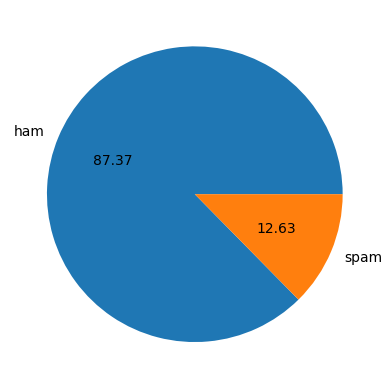

In [17]:
import matplotlib.pyplot as plt                                    #for ploting pychart 
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [18]:
#Big chunk of ham and very less spam so out data is not balanced

In [19]:
import nltk #national language toolkit

In [20]:
df['num_character']=df['text'].apply(len) #to check number of characters

In [21]:
df.head()

target                                               text  num_character
0       0  Go until jurong point, crazy.. Available only ...            111
1       0                      Ok lar... Joking wif u oni...             29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...            155
3       0  U dun say so early hor... U c already then say...             49
4       0  Nah I don't think he goes to usf, he lives aro...             61

In [22]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #Word count

In [23]:
df.head()

target                                               text  num_character  \
0       0  Go until jurong point, crazy.. Available only ...            111   
1       0                      Ok lar... Joking wif u oni...             29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...            155   
3       0  U dun say so early hor... U c already then say...             49   
4       0  Nah I don't think he goes to usf, he lives aro...             61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [24]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #Sentence 

In [25]:
df.head()

target                                               text  num_character  \
0       0  Go until jurong point, crazy.. Available only ...            111   
1       0                      Ok lar... Joking wif u oni...             29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...            155   
3       0  U dun say so early hor... U c already then say...             49   
4       0  Nah I don't think he goes to usf, he lives aro...             61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [26]:
df[['num_character','num_words','num_sentences']].describe()

num_character    num_words  num_sentences
count    5169.000000  5169.000000    5169.000000
mean       78.977945    18.455794       1.965564
std        58.236293    13.324758       1.448541
min         2.000000     1.000000       1.000000
25%        36.000000     9.000000       1.000000
50%        60.000000    15.000000       1.000000
75%       117.000000    26.000000       2.000000
max       910.000000   220.000000      38.000000

In [27]:
#Targeting ham
df[df['target']==0][['num_character','num_words','num_sentences']].describe()

num_character    num_words  num_sentences
count    4516.000000  4516.000000    4516.000000
mean       70.459256    17.123782       1.820195
std        56.358207    13.493970       1.383657
min         2.000000     1.000000       1.000000
25%        34.000000     8.000000       1.000000
50%        52.000000    13.000000       1.000000
75%        90.000000    22.000000       2.000000
max       910.000000   220.000000      38.000000

In [28]:
#Targeting spam
df[df['target']==1][['num_character','num_words','num_sentences']].describe()

num_character   num_words  num_sentences
count     653.000000  653.000000     653.000000
mean      137.891271   27.667688       2.970904
std        30.137753    7.008418       1.488425
min        13.000000    2.000000       1.000000
25%       132.000000   25.000000       2.000000
50%       149.000000   29.000000       3.000000
75%       157.000000   32.000000       4.000000
max       224.000000   46.000000       9.000000

In [29]:
import seaborn as sns                # used to check the above data in graph format 

<Axes: xlabel='num_character', ylabel='Count'>

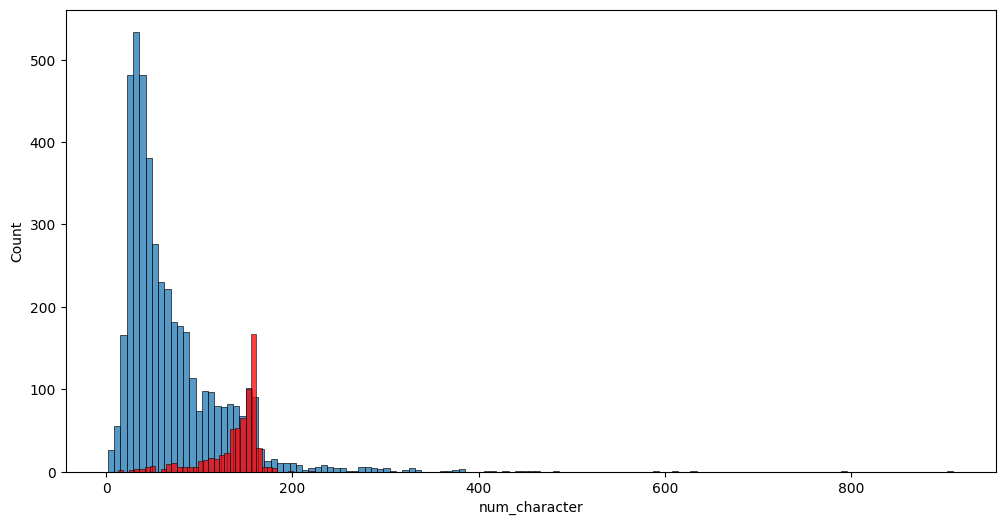

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_character'])
sns.histplot(df[df['target']==1]['num_character'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

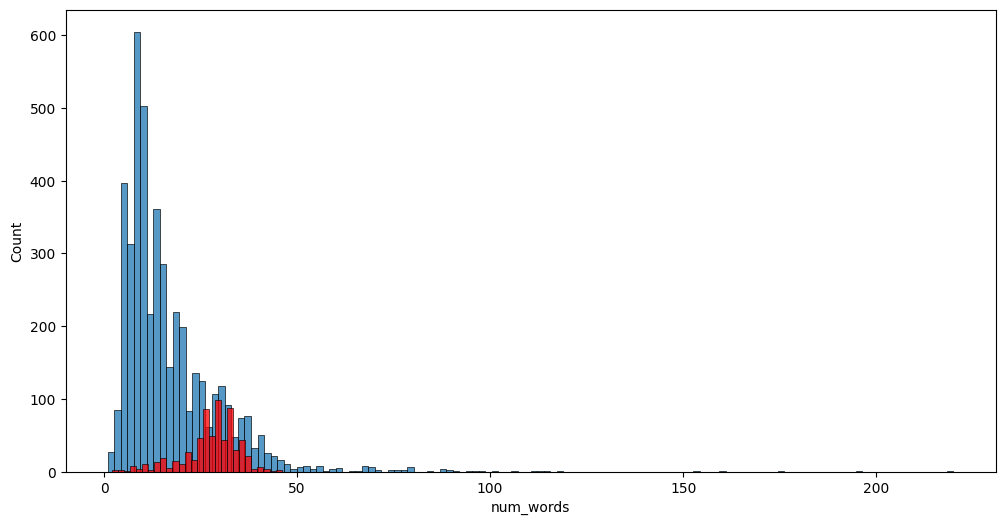

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

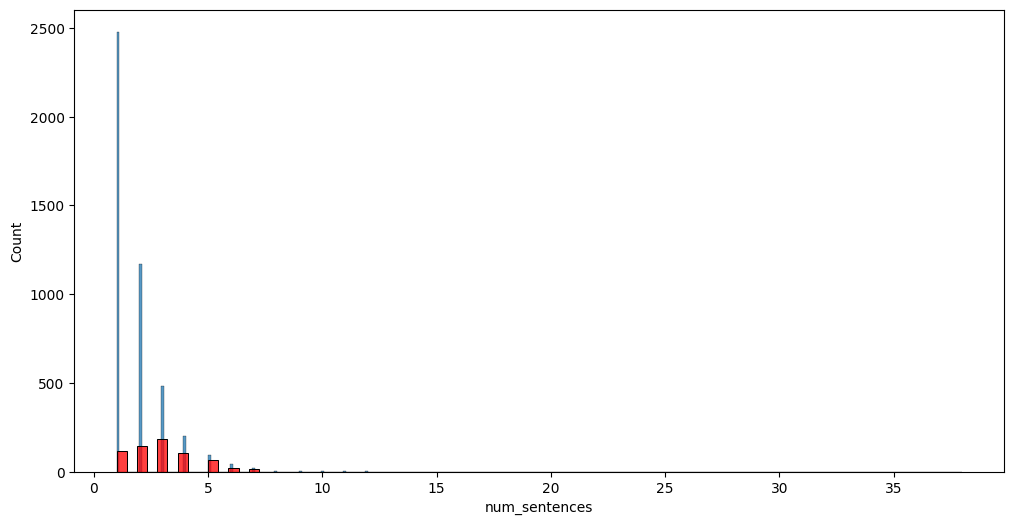

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red')

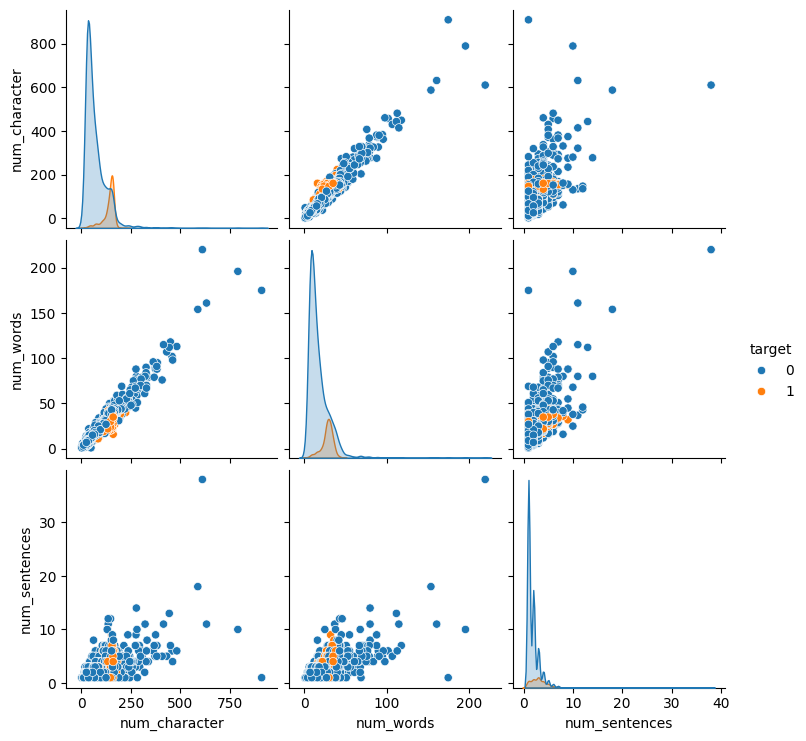

In [33]:
sns.pairplot(df,hue='target')

<Axes: >

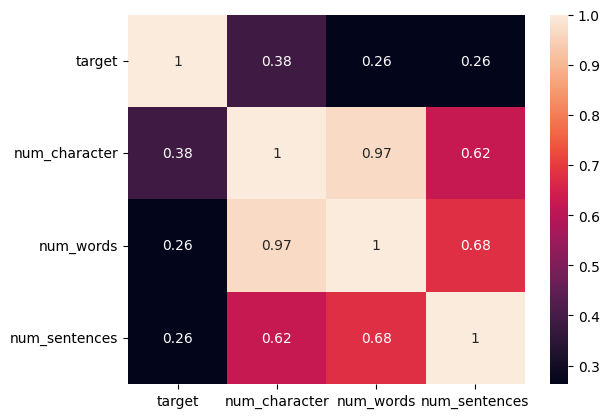

In [34]:

numeric_df = df.select_dtypes(include='number')        #corelation 
sns.heatmap(numeric_df.corr(), annot=True)


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   target         5169 non-null   int32 
 1   text           5169 non-null   object
 2   num_character  5169 non-null   int64 
 3   num_words      5169 non-null   int64 
 4   num_sentences  5169 non-null   int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [ ]:
#--------------Data Preprocessing-------------
#Lowercase
#Tokenization (breaking sentenses into words)
#Removing special characters
#Removing Stop words and punctuation
#Stemming(ex reading will convert to read)


In [38]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  # Correcting import name to match class name
import string 

nltk.download('stopwords')   # Downloading stopwords dataset

ps = PorterStemmer()  # Correcting class instantiation name


def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]  # Assigning filtered list back to 'text'
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]  # Assigning filtered list back to 'text'
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

transformed_text = transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today")
print(transformed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\O80862\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [40]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('walking')


'walk'

In [43]:
df['transformed_text']= df['text'].apply(transform_text)

In [44]:
df.head()

target                                               text  num_character  \
0       0  Go until jurong point, crazy.. Available only ...            111   
1       0                      Ok lar... Joking wif u oni...             29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...            155   
3       0  U dun say so early hor... U c already then say...             49   
4       0  Nah I don't think he goes to usf, he lives aro...             61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [45]:
from wordcloud import WordCloud     #Picturizing data
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc=wc.generate(df[df['target']==1] ['transformed_text'].str.cat(sep=" "))   #picturizing spam data

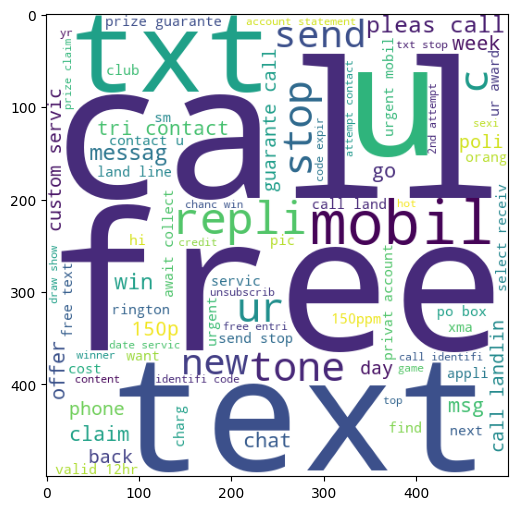

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
ham_wc=wc.generate(df[df['target']==0] ['transformed_text'].str.cat(sep=" "))   #picturizing ham data

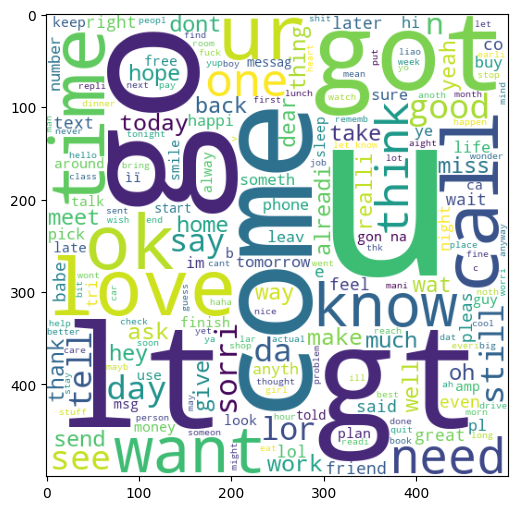

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
df.head()

target                                               text  num_character  \
0       0  Go until jurong point, crazy.. Available only ...            111   
1       0                      Ok lar... Joking wif u oni...             29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...            155   
3       0  U dun say so early hor... U c already then say...             49   
4       0  Nah I don't think he goes to usf, he lives aro...             61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [51]:
#it will give number of words you have in spam
spam_corpus = []
for msg in df[df['target'] == 1] ['transformed_text'].tolist():
   for word in msg.split():
      spam_corpus.append(word)


In [52]:
len(spam_corpus)

9939

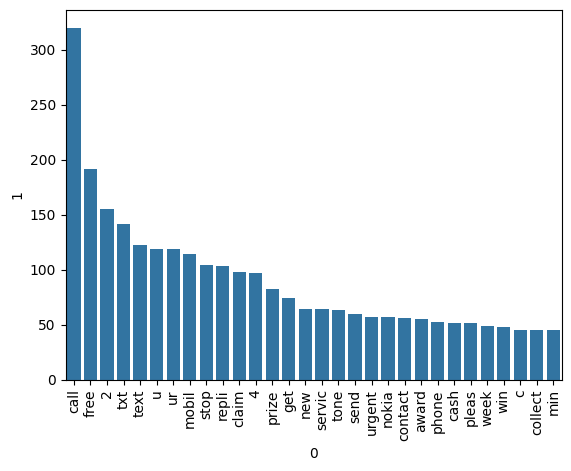

In [53]:

from collections import Counter
import seaborn as sns
import pandas as pd

# Assuming spam_corpus is your list of text data
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [54]:
#it will give number of words you have in ham
ham_corpus = []
for msg in df[df['target'] == 0] ['transformed_text'].tolist():
   for word in msg.split():
      ham_corpus.append(word)


In [55]:
len(ham_corpus)

35404

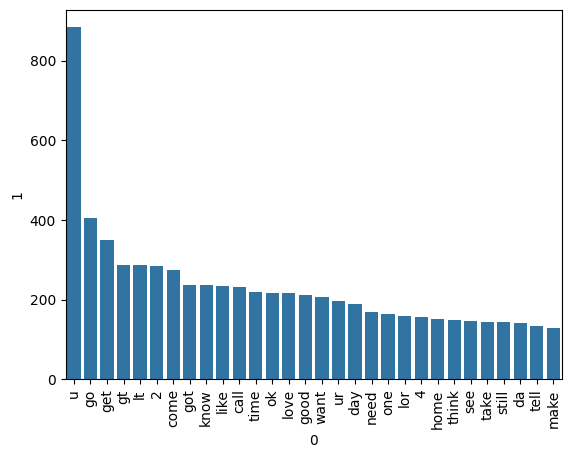

In [56]:

from collections import Counter
import seaborn as sns
import pandas as pd

# Assuming spam_corpus is your list of text data
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], 
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()


In [57]:
#Text vectorization
#Using bar of words
df.head()

target                                               text  num_character  \
0       0  Go until jurong point, crazy.. Available only ...            111   
1       0                      Ok lar... Joking wif u oni...             29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...            155   
3       0  U dun say so early hor... U c already then say...             49   
4       0  Nah I don't think he goes to usf, he lives aro...             61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [58]:
#....................MODEL BUILDING..............

In [62]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [63]:
X = tfidf.fit_transform(df['transformed_text']).toarray ()

In [64]:
#from sklearn.preprocessing import minMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [65]:
#appending the num_character col to X
#X = np.hstack((X, df['num_characters'].values.reshape(-1,1)))


In [66]:
X.shape

(5169, 3000)

In [67]:
y = df['target'].values

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)  #20%

In [70]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [71]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))                #86%(low accuracy)
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [73]:
mnb.fit(X_train,y_train)
y_pred1 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))               #97% with 0 array which is good
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [74]:
bnb.fit(X_train,y_train)
y_pred1 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))                   #98% with 1 array
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [75]:
#So finally we are using tfidf---->MNB

In [76]:
!pip install xgboost

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier             #possible ML mathods can use
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [79]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svm_classifier = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)



In [80]:
clfs = {
    'LR' : lrc,
    'SVC' : svm_classifier,
    'NB' : mnb,
    'DT' : dtc,
    'KN' : knc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' : etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}
        
    
    

In [81]:
from sklearn.metrics import accuracy_score, precision_score
def train_classifier(clf,X_train, y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [82]:
train_classifier(svm_classifier,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [83]:
accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)
    print("for ",name)
    print("accuracy - ",current_accuracy)
    print("precision - ",current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  LR
accuracy -  0.9584139264990329
precision -  0.9702970297029703
for  SVC
accuracy -  0.9758220502901354
precision -  0.9747899159663865
for  NB
accuracy -  0.9709864603481625
precision -  1.0
for  DT
accuracy -  0.9323017408123792
precision -  0.8333333333333334
for  KN
accuracy -  0.9052224371373307
precision -  1.0
for  RF
accuracy -  0.9758220502901354
precision -  0.9829059829059829


C:\Users\O80862\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for  AdaBoost
accuracy -  0.960348162475822
precision -  0.9292035398230089
for  BgC
accuracy -  0.9584139264990329
precision -  0.8682170542635659
for  ETC
accuracy -  0.9748549323017408
precision -  0.9745762711864406
for  GBDT
accuracy -  0.9468085106382979
precision -  0.9191919191919192
for  xgb
accuracy -  0.9671179883945842
precision -  0.9262295081967213


In [96]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'precision':precision_scores}).sort_values('precision',ascending=False)

In [97]:
performance_df

Algorithm  Accuracy  precision
2         NB  0.970986   1.000000
4         KN  0.905222   1.000000
5         RF  0.975822   0.982906
1        SVC  0.975822   0.974790
8        ETC  0.974855   0.974576
0         LR  0.958414   0.970297
6   AdaBoost  0.960348   0.929204
10       xgb  0.967118   0.926230
9       GBDT  0.946809   0.919192
7        BgC  0.958414   0.868217
3         DT  0.932302   0.833333

In [98]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")


In [94]:
performance_df1

Algorithm   variable     value
0         NB   Accuracy  0.970986
1         KN   Accuracy  0.905222
2         RF   Accuracy  0.975822
3        SVC   Accuracy  0.975822
4        ETC   Accuracy  0.974855
5         LR   Accuracy  0.958414
6   AdaBoost   Accuracy  0.960348
7        xgb   Accuracy  0.967118
8       GBDT   Accuracy  0.946809
9        BgC   Accuracy  0.958414
10        DT   Accuracy  0.932302
11        NB  precision  1.000000
12        KN  precision  1.000000
13        RF  precision  0.982906
14       SVC  precision  0.974790
15       ETC  precision  0.974576
16        LR  precision  0.970297
17  AdaBoost  precision  0.929204
18       xgb  precision  0.926230
19      GBDT  precision  0.919192
20       BgC  precision  0.868217
21        DT  precision  0.833333

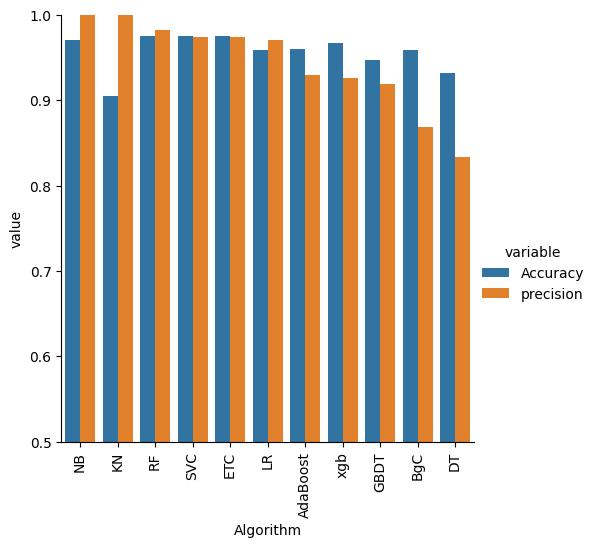

In [100]:
sns.catplot(x = 'Algorithm',y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [101]:
#model improve
#1. chnage the max_features parameter of Tfidf

In [102]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'precision_max_ft_3000':precision_scores}).sort_values('precision_max_ft_3000',ascending=False)

In [103]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [104]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [105]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'precision_num_chars':precision_scores}).sort_values('precision_num_chars',ascending=False)

In [106]:
new_df_scaled.merge(temp_df,on='Algorithm')

Algorithm  Accuracy  precision  Accuracy_max_ft_3000_x  \
0         NB  0.970986   1.000000                0.970986   
1         KN  0.905222   1.000000                0.905222   
2         RF  0.975822   0.982906                0.975822   
3        SVC  0.975822   0.974790                0.975822   
4        ETC  0.974855   0.974576                0.974855   
5         LR  0.958414   0.970297                0.958414   
6   AdaBoost  0.960348   0.929204                0.960348   
7        xgb  0.967118   0.926230                0.967118   
8       GBDT  0.946809   0.919192                0.946809   
9        BgC  0.958414   0.868217                0.958414   
10        DT  0.932302   0.833333                0.932302   

    precision_max_ft_3000_x  Accuracy_max_ft_3000_y  precision_max_ft_3000_y  \
0                  1.000000                0.970986                 1.000000   
1                  1.000000                0.905222                 1.000000   
2                  0.982906                0.975822                 0.982906   
3                  0.974790                0.975822                 0.974790   
4                  0.974576                0.974855                 0.974576   
5                  0.970297                0.958414                 0.970297   
6                  0.929204                0.960348                 0.929204   
7                  0.926230                0.967118                 0.926230   
8                  0.919192                0.946809                 0.919192   
9                  0.868217                0.958414                 0.868217   
10                 0.833333                0.932302                 0.833333   

    Accuracy_num_chars  precision_num_chars  
0             0.970986             1.000000  
1             0.905222             1.000000  
2             0.975822             0.982906  
3             0.975822             0.974790  
4             0.974855             0.974576  
5             0.958414             0.970297  
6             0.960348             0.929204  
7             0.967118             0.926230  
8             0.946809             0.919192  
9             0.958414             0.868217  
10            0.932302             0.833333

In [107]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier

In [108]:
voting= VotingClassifier(estimators=[('svm_classifier',svc),('nb',mnb),('et',etc)],voting='soft')

In [109]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm_classifier',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [110]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",accuracy_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9816247582205029


In [111]:
#applying stacking 
estimators=[('svm_classifier',SVC),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [112]:
from sklearn.ensemble import StackingClassifier

In [113]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",accuracy_score(y_test,y_pred))

Accuracy 0.9671179883945842
Precision 0.9671179883945842


In [114]:
import pickle
pickle.dump(tfidf,open('vectorizer.pk1','wb'))
pickle.dump(mnb,open('model.pk1','wb'))

In [115]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

X_train = ["sample text 1", "sample text 2","sample text 3"]
y_train = [0,1,0] #example labels(0 negative 1 for positive)

tfidf =TfidfVectorizer(lowercase=True, stop_words='english')
x_train_tfidf =tfidf.fit_transform(X_train)

mnb = MultinomialNB()
mnb.fit(x_train_tfidf,y_train)

with open('vectorizer.pk1','wb') as vectorizer_file:
    pickle.dump(tfidf,vectorizer_file)
with open('model.pk1','wb') as model_file:
    pickle.dump(mnb,model_file)

In [ ]:
import streamlit as st
import pickle

#lets load the saved vectorizer and naive model
tfidf = pickle.load(open('vectorizer.pk1','rb'))
model = pickle.load(open('model.pk1','rb'))

#transform_text function for text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')
ps = PorterStemmer()

def transform_text(text):
   text = text.lower() #converting to lowercase
   text = nltk.word_tokenize(text) #Tokenize
   text = [word for word in text if word.isalnum()] #removing special characters and retaining alphanumeric words

   text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]#Removing stopwords and punctuations

   text = [ps.stem(word) for word in text] #applying stemming
   return " ".join(text)

#Streamlit code
st.title("SMS Classifier")
input_sms = st.text_area("Enter message")

if st.button('Predict'):
    #preprocess
    transformed_sms = transform_text(input_sms)
    #vectorize
    vector_input = tfidf.transform([transformed_sms])
    #predict
    result = model.predict(vector_input)[0]
    #display
    if result == 1:
      st.header("Spam")
    else:
      st.header("Not Spam")

    